# Recommendation System : Anime

![anime](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F11299784%2Fcaaff69976c0a1e97c7d55eb82383680%2Fstatic-assets-upload6207184415643227018.jpg?generation=1686492418151095&alt=media)

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tflw
from tensorflow import keras
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection

In [3]:
!pip install -q kaggle

In [4]:
!kaggle datasets download -d dbdmobile/myanimelist-dataset

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
100% 1.79G/1.80G [00:25<00:00, 52.8MB/s]
100% 1.80G/1.80G [00:25<00:00, 76.2MB/s]


## Data Understanding

adalah tahap dalam proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

### Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

<br>


**Informasi Datasets**


| Jenis    | Keterangan                                                |
|----------|-----------------------------------------------------------|
| Title    | Anime Dataset 2023                                        |
| Source   |[Kaggle](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data?select=anime-filtered.csv)                                                  |
| Maintainer | [Sajid](https://www.kaggle.com/dbdmobile)                                                   |
| License  | Database: Open Database, Contents: Database Contents      |
| Visibility | Publik                                                  |
| Tags     | Arts and Entertainment, Movies and TV Shows, Anime and Manga, Popular Culture, Japan |
| Usability | 10.00                                                     |

In [5]:
path = '/content/drive/MyDrive/Submission Dicoding Sistem Rekomendasi/myanimelist-dataset.zip'
extract_to = '/content'

In [6]:
import zipfile

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [7]:
anime_data = pd.read_csv('/content/anime-dataset-2023.csv')
user_detail = pd.read_csv('/content/users-details-2023.csv')
user_rating = pd.read_csv('/content/users-score-2023.csv')

In [8]:
anime_data.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [9]:
user_detail.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [10]:
user_rating.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


### Exploratory Data Analysis - Deskripsi Variabel

In [11]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [12]:
user_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [13]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


In [14]:
anime_data.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [15]:
user_detail.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,7.312900e+05,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,7.312820e+05
mean,5.070203e+05,24.180819,3.948018,4.765714,65.953066,3.391615,4.565480,17.547893,96.230147,4.443352,1.658828e+03
std,3.640147e+05,140.105073,4.137606,20.495890,186.633286,19.296913,34.915341,90.286927,265.459220,29.693175,5.077168e+04
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.011085e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.251705e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+01
75%,7.753400e+05,24.800000,8.040000,4.000000,48.000000,1.000000,1.000000,5.000000,74.000000,0.000000,1.489000e+03
max,1.291097e+06,105338.600000,255.000000,4358.000000,13226.000000,5167.000000,14341.000000,21804.000000,24817.000000,13215.000000,3.376442e+07


In [16]:
user_rating.describe()

,user_id,anime_id,rating
count,2.432519e+07,2.432519e+07,2.432519e+07
mean,4.403843e+05,9.754686e+03,7.622930e+00
std,3.669469e+05,1.206196e+04,1.661510e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.718800e+04,8.730000e+02,7.000000e+00
50%,3.879780e+05,4.726000e+03,8.000000e+00
75%,5.280430e+05,1.316100e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


In [17]:
anime_data.shape

(24905, 24)

In [18]:
user_detail.shape

(731290, 16)

In [19]:
user_rating.shape

(24325191, 5)

Dari Output diatas didapat informasi:
<br>

| Nama Dataset           | Jumah Baris             | Jumlah Kolom |
|------------------------|-------------------------|--------------|
| anime-dataset-2023.csv | 24905                   | 24            |

<br>

| Nama Dataset           | Jumah Baris             | Jumlah Kolom |
|------------------------|-------------------------|--------------|
| users-details-2023.csv | 731290                  | 16            |

<br>

| Nama Dataset           | Jumah Baris             | Jumlah Kolom |
|------------------------|-------------------------|--------------|
| users-score-2023.csv   | 24325191                | 5            |


### Exploratory Data Analysis - Menangani Missing Value

In [20]:
anime_data.duplicated().sum()

0

In [21]:
user_detail.duplicated().sum()

0

In [22]:
user_rating.duplicated().sum()

0

setelah dicek tidak terdapat data yang duplicated pada ke-3 file tersebut

In [23]:
anime_data.isnull().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


In [24]:
user_detail.isnull().sum()

,0
Mal ID,0
Username,1
Gender,506907
Birthday,563222
Location,578485
Joined,0
Days Watched,8
Mean Score,8
Watching,8
Completed,8


In [25]:
user_rating.isnull().sum()

,0
user_id,0
Username,232
anime_id,0
Anime Title,0
rating,0


dari output diatas didapati bahwa terdapat missing value pada dataset user_detail pada atribut Username dengan jumlah 1
, Gender berjumlah 506907, Birthday berjumlah 563222, Location berjumlah 578485 dan pada dataset user rating missing value berjumlah 232 pada atribut username.

In [26]:
user_detail.dropna()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
5,20,vondur,Male,1988-01-25T00:00:00+00:00,"Bergen, Norway",2005-01-05T00:00:00+00:00,73.1,8.06,11.0,94.0,11.0,2.0,20.0,138.0,7.0,4374.0
11,66,Hiromi,Male,1990-02-09T00:00:00+00:00,"Calgary, AB",2005-04-01T00:00:00+00:00,70.6,7.53,34.0,148.0,13.0,6.0,10.0,211.0,50.0,4117.0
16,82,Achtor,Male,1989-06-10T00:00:00+00:00,"Paris, France",2005-04-29T00:00:00+00:00,47.0,7.17,6.0,153.0,36.0,20.0,101.0,316.0,0.0,2922.0
23,112,luffykun,Male,1983-06-09T00:00:00+00:00,"London,England",2005-06-17T00:00:00+00:00,72.6,8.77,2.0,125.0,0.0,0.0,1.0,128.0,0.0,4329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731265,1291005,aktuos,Male,1992-07-16T00:00:00+00:00,mansoura,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731266,1291009,blazkiller123,Male,1994-08-20T00:00:00+00:00,"Palm Desert, CA",2012-05-06T00:00:00+00:00,64.8,8.72,4.0,142.0,0.0,2.0,97.0,245.0,13.0,3831.0
731269,1291017,alexlil,Male,1996-12-07T00:00:00+00:00,"Toronto, Ontario",2012-05-06T00:00:00+00:00,204.9,8.20,15.0,554.0,23.0,17.0,51.0,660.0,27.0,12298.0
731270,1291021,Ftv-kun,Male,1991-12-11T00:00:00+00:00,"Moscow, Russia",2012-05-06T00:00:00+00:00,24.4,7.62,2.0,77.0,4.0,8.0,11.0,102.0,0.0,1405.0


In [27]:
user_rating.dropna()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
...,...,...,...,...,...
24325186,1291087,Oblongata,10611,R-15,3
24325187,1291087,Oblongata,174,Tenjou Tenge,6
24325188,1291097,JuunanaSai,1535,Death Note,9
24325189,1291097,JuunanaSai,226,Elfen Lied,10


In [28]:
user_detail.shape

(731290, 16)

In [29]:
user_rating.shape

(24325191, 5)

total data setelah menghapus missig value seperti table berikut:

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 731290 | 16 |

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 24325191 | 5 |

### Exploratory Data Analysis - Univariate Analysis

<ipython-input-30-3ad31e542f6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=anime_data['Type'], data=anime_data, order=anime_data['Type'].value_counts().index, palette='Set3')


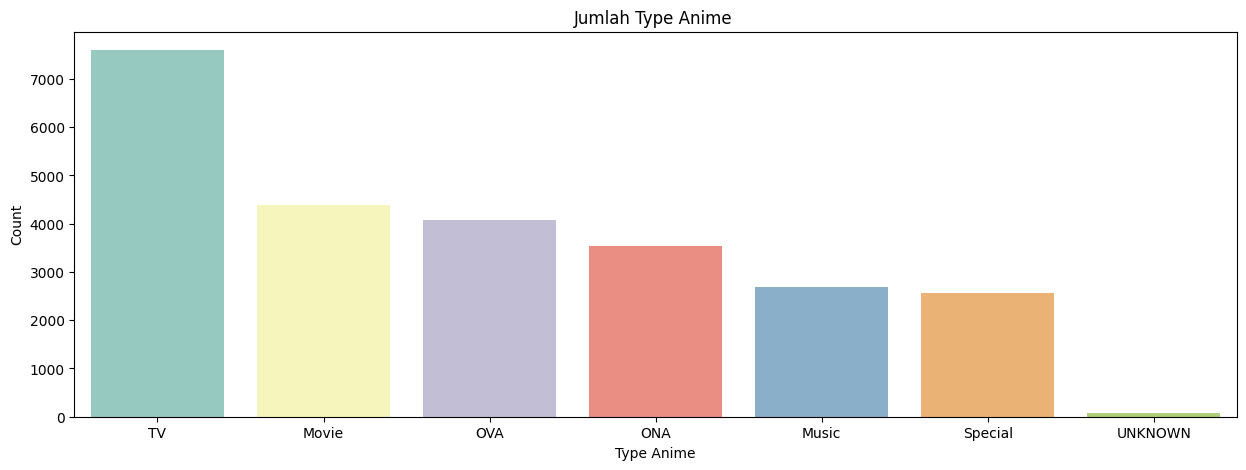

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot(x=anime_data['Type'], data=anime_data, order=anime_data['Type'].value_counts().index, palette='Set3')
plt.title('Jumlah Type Anime ')
plt.xlabel('Type Anime')
plt.ylabel('Count')
plt.show()


Dari visualisasi diatas dapat dilihat pada dataset Type Anime TV menduduki jumlah paling tinggi disusul Movie dan OVA dan paling lalu ada Type anime UNKNOWN dengan jumlah paling sedikit

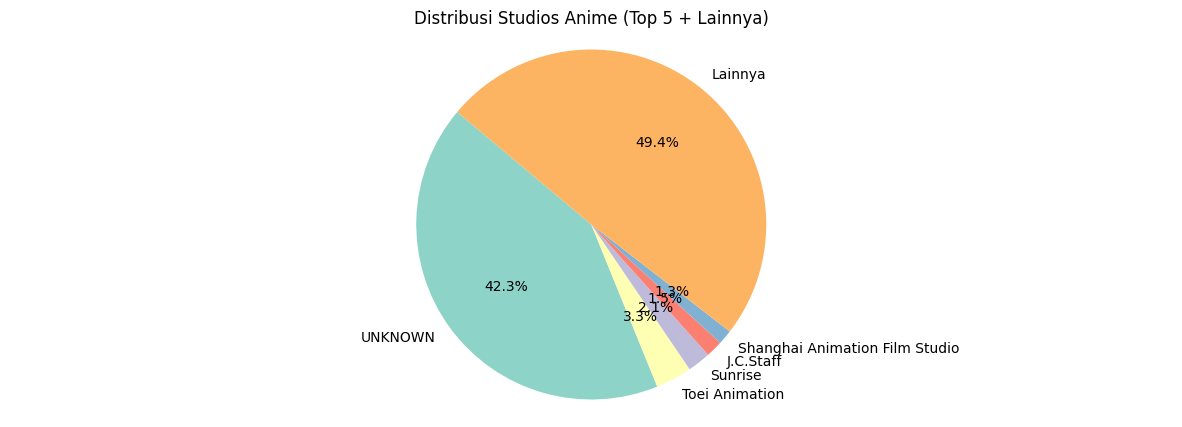

In [31]:
# Menghitung jumlah studios
studio_counts = anime_data['Studios'].value_counts()

# Mengelompokkan studios dengan jumlah terbanyak
top_studios = studio_counts.head(5)  # Mengambil 5 studio teratas
other_count = studio_counts.iloc[5:].sum()  # Menghitung total untuk studio lainnya
studio_counts_grouped = pd.concat([top_studios, pd.Series({'Lainnya': other_count})])  # Menggabungkan dengan pd.concat()

# Membuat pie chart
plt.figure(figsize=(15, 5))
plt.pie(studio_counts_grouped, labels=studio_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', n_colors=len(studio_counts_grouped)))
plt.title('Distribusi Studios Anime (Top 5 + Lainnya)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


Pada Visualisasi Top 5 distribusi Studio Anime terbanyak pada dataset sebesar 42.3% Tidak diketahu (UNKNOWN) lalu 3,3% untuk Studio Toei Animation, 2.1% Studio Sunrise, 1.5% Studio J.C.Staff, 1.3% Shanghai Animation Film Studio dan 49.4% untuk studio lainnya.

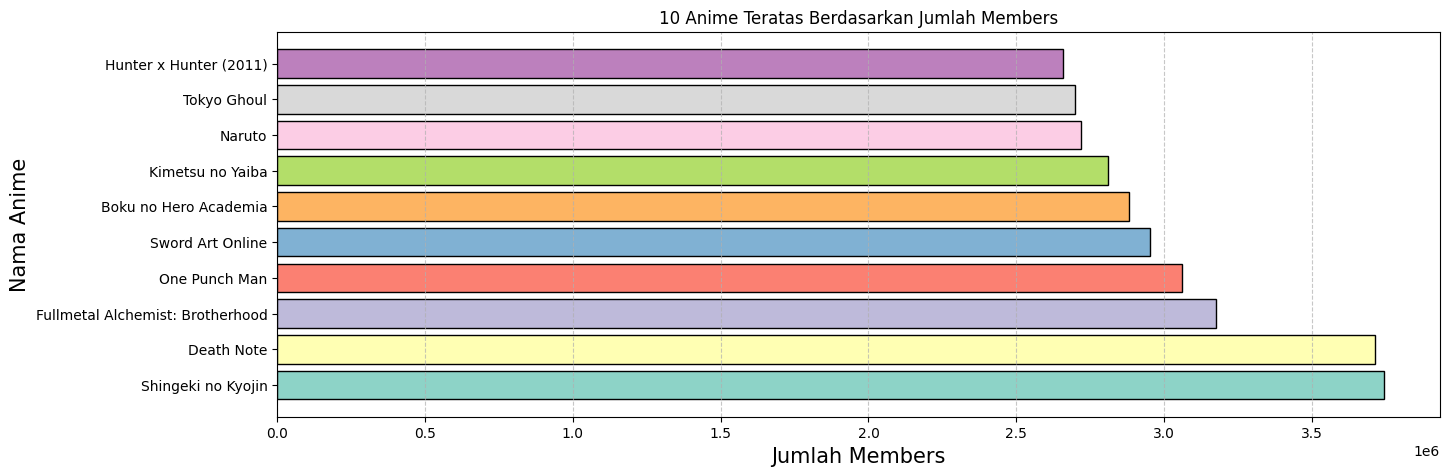

In [32]:
# Data 10 anime teratas berdasarkan jumlah members
top10_anime = anime_data.nlargest(10, 'Members')[['Name', 'Members']]

# Menggunakan palet warna dari Seaborn
colors = sns.color_palette('Set3', n_colors=10)

# Plot bar horizontal
plt.figure(figsize=(15, 5))
plt.barh(top10_anime['Name'], top10_anime['Members'], color=colors * (len(top10_anime) // len(colors) + 1), edgecolor='black')
plt.xlabel('Jumlah Members', fontsize=15)
plt.ylabel('Nama Anime', fontsize=15)
plt.title("10 Anime Teratas Berdasarkan Jumlah Members")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


dari visualisasi diatas dapat dilihat top 10 anime teratas berdasarkan jumlah membernya mulai dari shingeki no kyojin hingga hunter x hunter.

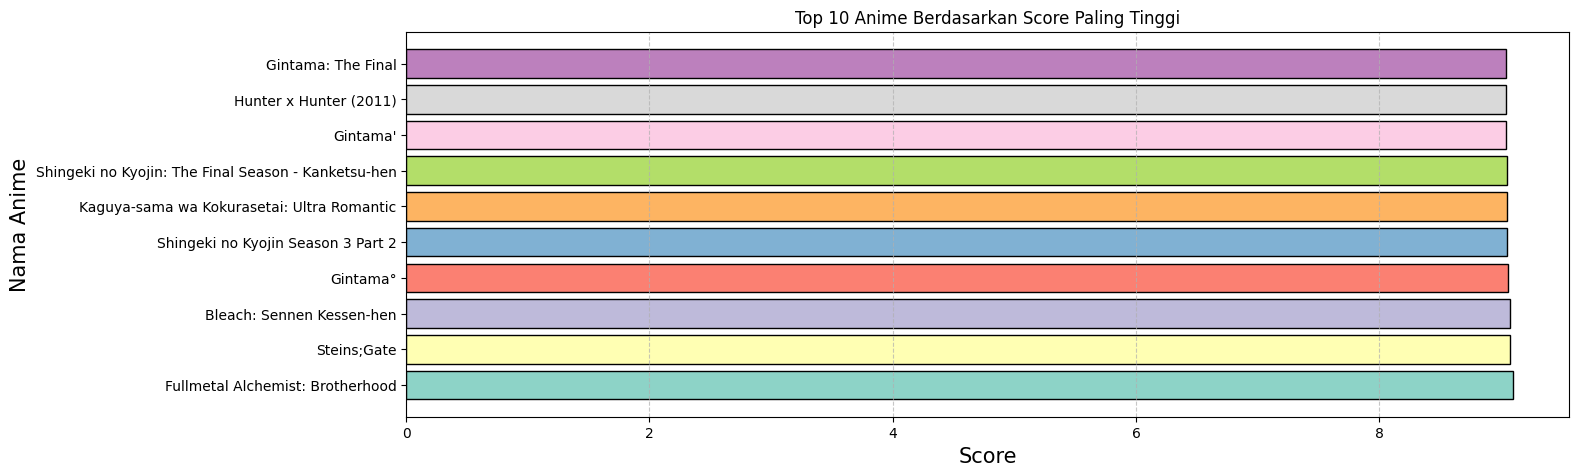

In [33]:
# Ubah 'Score' menjadi numerik, abaikan nilai yang tidak bisa dikonversi
anime_data['Score'] = pd.to_numeric(anime_data['Score'], errors='coerce')

# Hapus baris dengan nilai NaN di kolom 'Score'
anime_data = anime_data.dropna(subset=['Score'])

# Data 10 anime teratas berdasarkan 'Score'
top10_anime = anime_data.nlargest(10, 'Score')[['Name', 'Score']]

# Menggunakan palet warna dari Seaborn
colors = sns.color_palette('Set3', n_colors=len(top10_anime))  # Mengambil warna dari palet

# Plot bar horizontal
plt.figure(figsize=(15, 5))
plt.barh(top10_anime['Name'], top10_anime['Score'], color=colors, edgecolor='black')
plt.xlabel('Score', fontsize=15)
plt.ylabel('Nama Anime', fontsize=15)
plt.title("Top 10 Anime Berdasarkan Score Paling Tinggi")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

dari visualisasi diatas dapat dilihat top 10 anime teratas berdasarkan skor paling tinggi jika diambil 10 teratas berdasarkan score maka hasilnya berbeda dengan 10 anime teratas berdasarkan jumlah membernya.

### Exploratory Data Analysis - Multivariate Analysis

Korelasi antara Members dan Popularity:
             Members  Popularity
Members     1.000000   -0.430301
Popularity -0.430301    1.000000


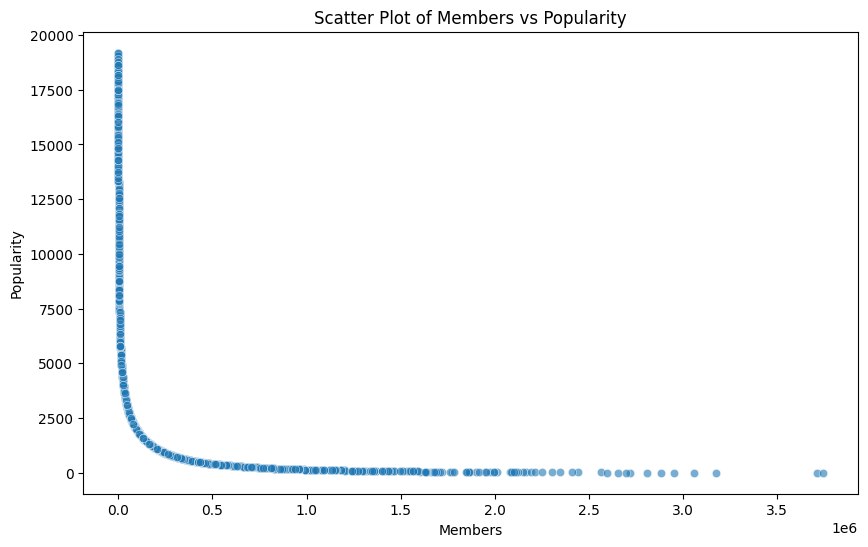

In [34]:
# Menghitung korelasi antara 'Members' dan 'Popularity'
correlation = anime_data[['Members', 'Popularity']].corr()

print("Korelasi antara Members dan Popularity:")
print(correlation)

# Visualisasi scatter plot untuk melihat hubungan antara Members dan Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_data, x='Members', y='Popularity', alpha=0.6)
plt.title('Scatter Plot of Members vs Popularity')
plt.xlabel('Members')
plt.ylabel('Popularity')
plt.show()

Nilai korelasi negatif sebesar -0.36 menunjukkan adanya hubungan negatif sedang antara jumlah Members dan Popularity. Ini berarti bahwa anime dengan jumlah Members yang lebih tinggi cenderung memiliki nilai Popularity yang lebih rendah.

Korelasi antara Members dan Popularity:
            Favorites  Popularity
Favorites    1.000000   -0.197441
Popularity  -0.197441    1.000000


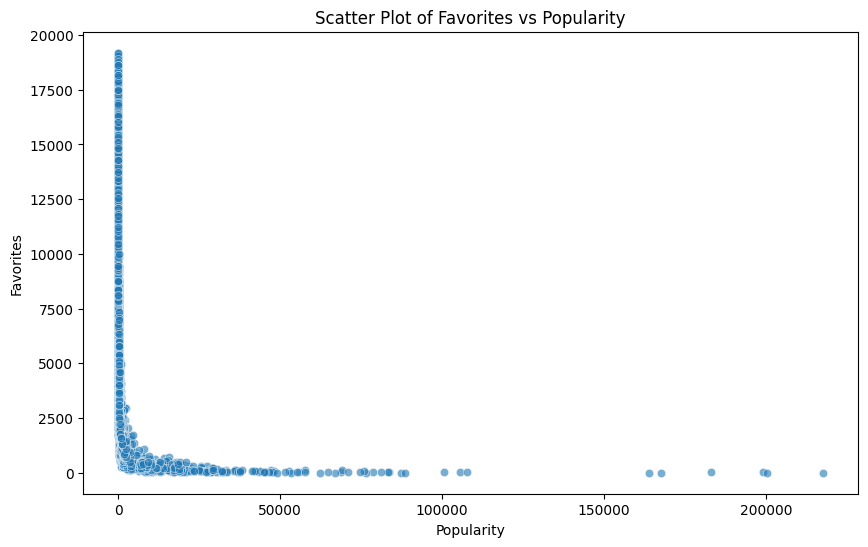

In [35]:
# Menghitung korelasi antara 'Members' dan 'Popularity'
correlation = anime_data[['Favorites', 'Popularity']].corr()

print("Korelasi antara Members dan Popularity:")
print(correlation)

# Visualisasi scatter plot untuk melihat hubungan antara Members dan Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_data, x='Favorites', y='Popularity', alpha=0.6)
plt.title('Scatter Plot of Favorites vs Popularity')
plt.ylabel('Favorites')
plt.xlabel('Popularity')
plt.show()

 Nilai korelasi negatif ini menunjukkan hubungan yang lemah antara jumlah Favorites dan Popularity. Korelasi negatif berarti bahwa ketika jumlah Favorites meningkat, nilai Popularity (peringkat) cenderung menurun, meskipun hubungannya tidak kuat.

Korelasi antara Members dan Members:
           Favorites   Members
Favorites   1.000000  0.774265
Members     0.774265  1.000000


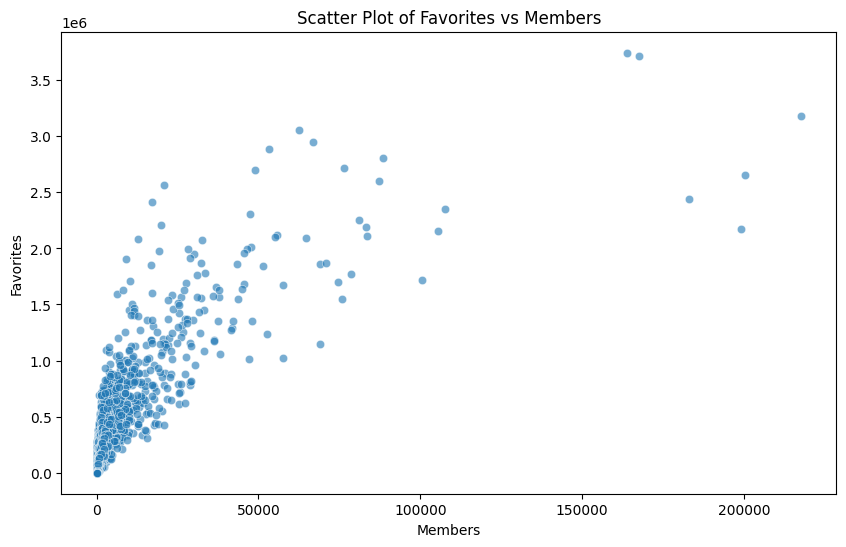

In [36]:
# Menghitung korelasi antara 'Members' dan 'Popularity'
correlation = anime_data[['Favorites', 'Members']].corr()

print("Korelasi antara Members dan Members:")
print(correlation)

# Visualisasi scatter plot untuk melihat hubungan antara Members dan Members
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_data, x='Favorites', y='Members', alpha=0.6)
plt.title('Scatter Plot of Favorites vs Members')
plt.ylabel('Favorites')
plt.xlabel('Members')
plt.show()

Nilai korelasi 0.773 menunjukkan adanya hubungan positif yang kuat antara jumlah Favorites dan Members. Ini berarti bahwa anime dengan jumlah Members yang tinggi cenderung juga memiliki jumlah Favorites yang tinggi.

### Data Preprocessing

sebelumnya kita memiliki 3 file csv dan setelah di cek untuk melakukan Content Based Filtering kita cukup menggunakan dataset anime-dataset-2023 dan untuk Collaborative Filtering kita cukup menggunakan users-score-2023 yang kemudian akan kita simpan kedalam 2 data frame Anime dan Rating.

**Hapus beberapa atribut yang tidak terlalu penting pada data Anime**

In [37]:
print("Daftar Atribut:")
print(anime_data.columns.tolist())

Daftar Atribut:
['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres', 'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL']


In [38]:
Anime = anime_data.drop(columns=[
    'English name', 'Other name', 'Synopsis','Episodes', 'Aired', 'Premiered',
    'Status', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
    'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL', 'Score','Type'
    ])


**Hapus beberapa atribut yang tidak terlalu penting pada data Rating**

In [39]:
print("Daftar Atribut:")
print(user_rating.columns.tolist())

Daftar Atribut:
['user_id', 'Username', 'anime_id', 'Anime Title', 'rating']


In [40]:
Rating = user_rating.drop(columns=[
    'Anime Title',
    'Username'
])

**Menyamakan Anime Genres**

In [41]:
fix_anime = Anime.sort_values('anime_id', ascending=True)
fix_anime

,anime_id,Name,Genres
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi"
2,6,Trigun,"Action, Adventure, Sci-Fi"
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural"
4,8,Bouken Ou Beet,"Adventure, Fantasy, Supernatural"
...,...,...,...
24590,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,"Action, Comedy, Mystery"
24635,55404,Slash,UNKNOWN
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN
24831,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,"Action, Adventure, Comedy, Fantasy"


Sekarang, kita memiliki 15692 baris data.

In [42]:
# Mengecek Genres yang unik
fix_anime.Genres.unique()

array(['Action, Award Winning, Sci-Fi', 'Action, Sci-Fi',
       'Action, Adventure, Sci-Fi',
       'Action, Drama, Mystery, Supernatural',
       'Adventure, Fantasy, Supernatural', 'Sports',
       'Comedy, Drama, Romance', 'Comedy, Slice of Life, Sports',
       'Action, Drama', 'Drama, Mystery, Suspense',
       'Action, Adventure, Fantasy', 'Action, Sports', 'Comedy, Romance',
       'Action, Adventure, Comedy, Sci-Fi, Ecchi',
       'Action, Drama, Sci-Fi', 'Action, Supernatural', 'Comedy, Gourmet',
       'Action, Avant Garde, Award Winning, Drama, Sci-Fi, Suspense',
       'Drama, Sci-Fi', 'Avant Garde, Drama, Sci-Fi',
       'Action, Adventure, Drama, Fantasy, Horror',
       'Action, Award Winning, Mystery, Sci-Fi, Suspense',
       'Action, Drama, Romance', 'Action, Adventure, Comedy, Romance',
       'Drama', 'Action, Adventure, Horror, Sci-Fi, Supernatural',
       'Adventure, Fantasy, Mystery', 'Comedy, Romance, Supernatural',
       'Action, Drama, Romance, Supernatural

In [43]:
fix_anime[fix_anime['Genres'] == 'UNKNOWN']

,anime_id,Name,Genres
485,518,Mahou no Princess Minky Momo,UNKNOWN
603,645,Hikaru no Go: Hokuto Hai e no Michi,UNKNOWN
894,989,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,UNKNOWN
1096,1203,Nitaboh,UNKNOWN
1115,1223,Ame to Shoujo to Watashi no Tegami,UNKNOWN
...,...,...,...
24528,55277,Shayou (Music),UNKNOWN
24549,55306,Telepath,UNKNOWN
24635,55404,Slash,UNKNOWN
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN


In [44]:
fix_anime = fix_anime[fix_anime['Genres'] != 'UNKNOWN']

karena kita akan membangun sistem rekomendasi anime berdasarkan genre anime untuk value genres UNKNOWN kita hapus.

In [45]:
fix_rating = Rating.sample(n=10000, random_state=42)

print(fix_rating.head())

          user_id  anime_id  rating
5104691     79182      6372       9
9309709    329223        87       7
15985036   475694      3588       9
14925220   451772      4654       6
18396653   533993     35076       7


In [47]:
example_rating = fix_rating.copy()
print(example_rating.head())

          user_id  anime_id  rating
5104691     79182      6372       9
9309709    329223        87       7
15985036   475694      3588       9
14925220   451772      4654       6
18396653   533993     35076       7


karena dataset Rating sangat banyak dan tidak sepadan dengan sumber daya yang saya miliki oleh karena itu kita akan mengambil beberap puluh ribu saja untuk dijadikan sample.

## Data Preparation

Teknik Data preparation yang dilakukan terdiri dari:

- TF-IDF Vectorizer Data Anime
- Encoding Data User Rating
- Train-test-split User Rating

### TF-IDF Vectorizer Data Anime

seperti yang kita ketahui komputer hanya bisa memproses data numerik oleh karena itu kita perlu mengubah nilai genres menjadi numerik dengan TfidfVectorizer,

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(fix_anime['Genres'])

tf.get_feature_names_out()

array(['action', 'adventure', 'avant', 'award', 'boys', 'comedy', 'drama',
       'ecchi', 'erotica', 'fantasy', 'fi', 'garde', 'girls', 'gourmet',
       'hentai', 'horror', 'life', 'love', 'mystery', 'of', 'romance',
       'sci', 'slice', 'sports', 'supernatural', 'suspense', 'winning'],
      dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [49]:
tfidf_matrix = tf.fit_transform(fix_anime['Genres'])

tfidf_matrix.shape

(13939, 27)

matriks yang kita miliki berukuran (13939, 27). Nilai 13939 merupakan ukuran data dan 27 merupakan genres anime.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Jalankan kode berikut.

In [50]:
tfidf_matrix.todense()

matrix([[0.26333381, 0.        , 0.        , ..., 0.        , 0.        ,
         0.60288472],
        [0.50393854, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.43374081, 0.50910943, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.58100111, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.45636858, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.4800077 , 0.56341585, 0.        , ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa anime dan genresnya. dengan kode berikut.

In [51]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=fix_anime.Name
).sample(27, axis=1).sample(10, axis=0)

,avant,mystery,drama,action,romance,fi,girls,sports,slice,love,...,boys,sci,supernatural,of,horror,suspense,comedy,garde,adventure,life
Name,,,,,,,,,,,,,,,,,,,,,
Jashin Shoukan: Inran Kyonyuu Oyako Ikenie Gishiki,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Monster Special Edition,0.0,0.546047,0.396577,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.737942,0.000000,0.0,0.000000,0.000000
Nerawareta Megami Tenshi Angeltia: Mamotta Ningen-tachi ni Uragirarete,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Hakumei no Tsubasa,0.0,0.000000,0.000000,0.480008,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.427354,0.0,0.563416,0.000000
Boku wa Tomodachi ga Sukunai Next,0.0,0.000000,0.000000,0.000000,0.568158,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.377275,0.0,0.000000,0.000000
GR: Giant Robo,0.0,0.000000,0.000000,0.000000,0.000000,0.583415,0.0,0.0,0.000000,0.0,...,0.0,0.583415,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.565026,0.000000
Fairy Ranmaru: Anata no Kokoro Otasuke Shimasu,0.0,0.000000,0.000000,0.329191,0.000000,0.000000,0.0,0.0,0.504932,0.0,...,0.0,0.000000,0.0,0.504932,0.0,0.000000,0.000000,0.0,0.000000,0.504932
Isshuukan Friends. Specials,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.577350,0.0,...,0.0,0.000000,0.0,0.577350,0.0,0.000000,0.000000,0.0,0.000000,0.577350
Mori no Densetsu,0.0,0.000000,0.329499,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.307004,0.000000


### Encoding Data User Rating

In [52]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = fix_rating['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [79182, 329223, 475694, 451772, 533993, 489671, 317854, 68115, 314866, 431564, 1160743, 443417, 459120, 1109163, 66216, 1080205, 81606, 509715, 353401, 330598, 554391, 1225439, 103461, 1101917, 1266997, 34237, 473184, 89097, 339712, 1239993, 37467, 24784, 441169, 566593, 105622, 109399, 442771, 37059, 429463, 313816, 40528, 74951, 960, 112881, 1092777, 465289, 1124367, 352109, 1083597, 1123279, 66039, 1119409, 303626, 475127, 72449, 334817, 1116913, 637945, 951047, 1095159, 1209649, 1128375, 380559, 107435, 6588, 57911, 376284, 561063, 13363, 449592, 399960, 1193315, 506485, 316056, 504335, 119595, 442705, 522961, 1128125, 10484, 424059, 4837, 1207543, 453209, 296575, 736161, 361428, 2096, 539735, 1229747, 373382, 56650, 38030, 532331, 523021, 58778, 307927, 466329, 1065293, 302842, 117357, 1193615, 9867, 64502, 1145853, 387374, 1106283, 26715, 107590, 66563, 1091063, 71451, 1104681, 510257, 398837, 374893, 390197, 301548, 344911, 438691, 1124, 1064341, 1240913, 77117, 5

Selanjutnya, lakukan hal yang sama pada fitur ‘anime_id’.

In [53]:
anime_ids = fix_rating['anime_id'].unique().tolist()

anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

Berikutnya, petakan user_id dan anime_id ke dataframe yang berkaitan.

In [54]:
fix_rating['user'] = fix_rating['user_id'].map(user_to_user_encoded)

fix_rating['anime'] = fix_rating['anime_id'].map(anime_to_anime_encoded)

dan terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah anime, dan mengubah nilai rating menjadi float.

In [55]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
print(num_anime)

# Mengubah rating menjadi nilai float
fix_rating['rating'] = fix_rating['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(fix_rating['rating'])

# Nilai maksimal rating
max_rating = max(fix_rating['rating'])

print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

9437
3143
Number of User: 9437, Number of anime: 3143, Min Rating: 1.0, Max Rating: 10.0


In [71]:
fix_rating

,user_id,anime_id,rating,user,anime
8676233,316962,12815,8.0,6034,2511
12276533,390488,2236,7.0,4562,273
22756124,1189963,1735,1.0,1714,636
11996396,384225,8407,8.0,4618,1086
22893367,1198457,14813,7.0,4407,2103
...,...,...,...,...,...
5987467,95384,7016,8.0,5552,1167
7538667,294805,4382,8.0,5038,77
2649219,35825,6336,10.0,5226,148
18605772,542173,10793,8.0,858,114


### Train-test-split User Rating

In [56]:
fix_rating = fix_rating.sample(frac=1, random_state=42)
fix_rating

,user_id,anime_id,rating,user,anime
8676233,316962,12815,8.0,6034,2511
12276533,390488,2236,7.0,4562,273
22756124,1189963,1735,1.0,1714,636
11996396,384225,8407,8.0,4618,1086
22893367,1198457,14813,7.0,4407,2103
...,...,...,...,...,...
5987467,95384,7016,8.0,5552,1167
7538667,294805,4382,8.0,5038,77
2649219,35825,6336,10.0,5226,148
18605772,542173,10793,8.0,858,114


lalu membagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, kita perlu memetakan (mapping) data user dan anime menjadi satu value terlebih dahulu. dan membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training

In [57]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = fix_rating[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = fix_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * fix_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[6034 2511]
 [4562  273]
 [1714  636]
 ...
 [5226  148]
 [ 858  114]
 [6957 2698]] [0.77777778 0.66666667 0.         ... 1.         0.77777778 0.66666667]


## Model and Result

Pada tahapan model yang digunakan terdiri dari:

- Cosine Similarity
- recomenderNet

### Model Development dengan Cosine Similarity

selanjutnya menghitung derajat kesamaan (similarity degree) antar anime dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn dengan kode berikut.

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.52255145, 0.44976098, ..., 0.15299724, 0.12017728,
        0.12640226],
       [0.52255145, 1.        , 0.8607018 , ..., 0.29278885, 0.22998171,
        0.24189438],
       [0.44976098, 0.8607018 , 1.        , ..., 0.25200389, 0.19794567,
        0.49503925],
       ...,
       [0.15299724, 0.29278885, 0.25200389, ..., 1.        , 0.47532137,
        0.82617346],
       [0.12017728, 0.22998171, 0.19794567, ..., 0.47532137, 1.        ,
        0.3926979 ],
       [0.12640226, 0.24189438, 0.49503925, ..., 0.82617346, 0.3926979 ,
        1.        ]])

tahapan ini, menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, jika sudah selesai menghitung kesamaan (similarity) antar restoran. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

In [59]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=fix_anime['Name'], columns=fix_anime['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (13939, 13939)


Name,Yin Yang Shi: Ping An Wu Yu,Nekopara,SD Gundam Sangokuden Brave Battle Warriors,Devour Dinner,Yurumates 3D Plus: Natsuyasumi Maison du Wish Report
Name,,,,,
Makai Ouji: Devils and Realist,0.111835,0.126880,0.000000,0.177574,0.126880
"Komi-san wa, Comyushou desu.",0.280071,0.317748,0.000000,0.000000,0.317748
Wake up!! Tamala,0.000000,0.000000,0.000000,0.366066,0.000000
Maison Ikkoku: Kanketsu-hen,0.122000,0.138412,0.000000,0.000000,0.138412
Doraemon Movie 05: Nobita no Makai Daibouken,0.000000,0.000000,0.000000,0.366066,0.000000
Tonari no 801-chan R,0.280071,0.317748,0.000000,0.000000,0.317748
Fate/Apocrypha,0.337161,0.000000,0.475429,0.188233,0.000000
Maids in Dream,0.000000,0.000000,0.000000,0.000000,0.000000
Chibi Maruko-chan: Watashi no Suki na Uta,0.687086,0.779517,0.000000,0.000000,0.779517


Dengan cosine similarity, kita berhasil mengidentifikasi kesamaan antara satu anime dengan anime lainnya. Shape (13939, 13939) merupakan ukuran matriks similarity dari data yang kita miliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 13939 anime x 13939 anime (masing-masing dalam sumbu X dan Y). Artinya, kita mengidentifikasi tingkat kesamaan pada 13939 nama anime.

**Hasil Rekomendasi Model Cosine Similarity Top-N**

Sebelumnya, hasil data similarity (kesamaan) antar anime, selanjutnya menghasilkan sejumlah anime yang akan direkomendasikan kepada pengguna.

Di sini, kita membuat fungsi anime_recommendations dengan beberapa parameter sebagai berikut:

Nama_anime : Nama anime (index kemiripan dataframe). Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya. Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘anime_name’ dan ‘’.Genres k : Banyak rekomendasi yang ingin diberikan. Sebelum mulai menulis kodenya, ingatlah kembali definisi sistem rekomendasi yang menyatakan bahwa keluaran sistem ini adalah berupa top-N recommendation.

In [60]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=fix_anime[['Name', 'Genres']], k=10):

    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

pada kode di atas, dengan menggunakan argpartition, kita mengambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, kita mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, kita perlu menghapus nama_anime yang yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, nanti kita akan mencari anime yang mirip dengan Tarareba, sehingga kita perlu drop nama_anime Tarareba agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.

In [61]:
fix_anime[fix_anime.Name.eq('Hajimete no Gal')]

,anime_id,Name,Genres
12335,34403,Hajimete no Gal,"Comedy, Romance, Ecchi"


Hasil Output di atas, `Hajimete no Gal` masuk dalam Genre `Comedy, Romance, Ecchi`. Tentu kita berharap rekomendasi yang diberikan adalah resto dengan kategori yang mirip. Nah, sekarang, dapatkan anime recommendation dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [62]:
anime_recommendations('Hajimete no Gal')

,Name,Genres
0,"High School DxD New: Oppai, Tsutsumimasu!","Comedy, Romance, Ecchi"
1,Love Hina Final Selection,"Comedy, Romance, Ecchi"
2,Mujaki no Rakuen,"Comedy, Romance, Ecchi"
3,1+2=Paradise,"Comedy, Romance, Ecchi"
4,Kimi ga Aruji de Shitsuji ga Ore de,"Comedy, Romance, Ecchi"
5,Gift: Eternal Rainbow - Ki no Saka Ryokan Kiki...,"Comedy, Romance, Ecchi"
6,Maji de Watashi ni Koi Shinasai!,"Comedy, Romance, Ecchi"
7,"Dakara Boku wa, H ga Dekinai. Mie Sugi! Mizugi...","Comedy, Romance, Ecchi"
8,Sprite: Between Two Worlds,"Comedy, Romance, Ecchi"
9,Megami no Café Terrace,"Comedy, Romance, Ecchi"


Sistem kita memberikan rekomendasi 10 anime dengan genre `Comedy, Romance, Ecchi`.

### Model Development dengan RecommenderNet

model menghitung skor kecocokan antara pengguna dan anime dengan teknik embedding, melakukan proses embedding terhadap data user dan anime. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan anime. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan anime. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

membuat class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan. Terapkan kode berikut.

In [63]:
class RecommenderNet(tflw.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tflw.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tflw.nn.sigmoid(x) # activation sigmoid

Selanjutnya, melakukan proses compile terhadap model.

In [64]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tflw.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tflw.keras.metrics.RootMeanSquaredError()]
)

Menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

**Training Model**

In [65]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.6929 - root_mean_squared_error: 0.2993 - val_loss: 0.6866 - val_root_mean_squared_error: 0.2958
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6069 - root_mean_squared_error: 0.2181 - val_loss: 0.6831 - val_root_mean_squared_error: 0.2926
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5821 - root_mean_squared_error: 0.1892 - val_loss: 0.6833 - val_root_mean_squared_error: 0.2929
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5736 - root_mean_squared_error: 0.1794 - val_loss: 0.6813 - val_root_mean_squared_error: 0.2910
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5710 - root_mean_squared_error: 0.1761 - val_loss: 0.6812 - val_root_mean_squared_error: 0.2911
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5676 - root_mean_squared_error: 0.1736 - val_loss: 0.6793 - val_root_mean_squared_error: 0.2893
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━

**Hasil Rekomendasi Model RecommenderNet Top-N**

mendapatkan rekomendasi Anime, dengan mengambil sampel user secara acak dan definisikan variabel anime_not_visited yang merupakan daftar Anime yang belum pernah dikunjungi oleh pengguna. karena daftar anime_not_visited inilah yang akan menjadi Anime yang kita rekomendasikan.

Sebelumnya, pengguna telah memberi rating pada beberapa Anime yang telah mereka kunjungi. Kita menggunakan rating ini untuk membuat rekomendasi anime yang mungkin cocok untuk pengguna. Nah, anime yang akan direkomendasikan tentulah anime yang belum pernah dikunjungi oleh pengguna. Oleh karena itu, kita perlu membuat variabel anime_not_visited sebagai daftar anime untuk direkomendasikan pada pengguna.

Variabel anime_not_visited diperoleh dengan menggunakan operator bitwise (~) pada variabel anime_visited_by_user.

dengan kode di bawah,

In [66]:
anime_df = fix_anime
df = example_rating

In [67]:
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
anime_visited_by_user = df[df.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
anime_not_visited = anime_df[~anime_df['anime_id'].isin(anime_visited_by_user.anime_id.values)]['anime_id']
anime_not_visited = list(
    set(anime_not_visited)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_visited = [[anime_to_anime_encoded.get(x)] for x in anime_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_visited), anime_not_visited)
)

In [68]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_visited[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi untuk pengguna: {}'.format(user_id))
print('===' * 15)
print('Anime dengan rating tertinggi dari pengguna')
print('---' * 15)

top_anime_user = (
    anime_visited_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.Name, ':', row.Genres)

print('---' * 15)
print('Rekomendasi 10 anime teratas')
print('---' * 15)

recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.Name, ':', row.Genres)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Menampilkan rekomendasi untuk pengguna: 707343
Anime dengan rating tertinggi dari pengguna
---------------------------------------------
New Game! : Comedy
---------------------------------------------
Rekomendasi 10 anime teratas
---------------------------------------------
s.CRY.ed : Action, Adventure, Drama, Sci-Fi
Slam Dunk : Sports
Tactics : Mystery, Supernatural
One Piece Film: Strong World : Action, Adventure, Fantasy
Major S5 : Sports
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono : Action, Adventure, Fantasy
Tegamibachi Reverse : Adventure, Fantasy
Natsume Yuujinchou San : Drama, Slice of Life, Supernatural
Haikyuu!! Karasuno Koukou vs. Shiratorizawa Gakuen Koukou : Sports
Bocchi the Rock! : Comedy


hasil di atas adalah rekomendasi untuk user dengan id 75809. Dari output tersebut, kita dapat membandingkan antara Anime dengan rating tertinggi dari pengguna dan Rekomendasi 10 anime teratas untuk user.

beberapa Anime rekomendasi menyediakan Genre yang sesuai dengan rating user. Kita memperoleh 1 rekomendasi anime dengan Genre Comedy, Drama, Romance.

## Evaluasi Model

### Visualisasi Matrix Root mean squared error (RMSE)

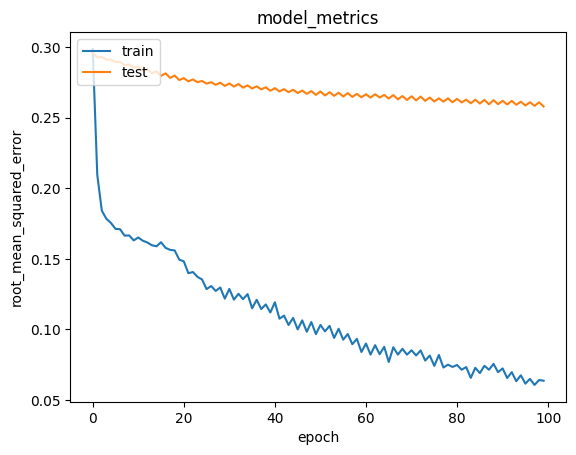

In [69]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.06 dan error pada data validasi sebesar 0.25. Nilai tersebut cukup bagus untuk sistem rekomendasi.

### Matrix Precision

menggunakan metrik Precision untuk mengetahui seberapa baik perforam model tersebut. Presisi adalah metrik yang biasa digunakan untuk mengevaluasi kinerja model pengelompokan. Metrik ini menghitung rasio antara nilai ground truth (nilai sebenarnya) dengan nilai prediksi yang positf. Perhitungan rasio ini dijabarkan melalui rumus di bawah ini:

$$ Precision = \frac{TP}{TP + FP} $$

Dimana:

- TP (*True Positive*), jumlah kejadian positif yang diprediksi dengan benar.
- FP (*False Positive*), jumlah kejadian positif yang diprediksi dengan salah.

Berdasarkan hasil yang dikeluarkan model `Cosine Similiarity` sebelumnya dapat dilihat bahwasanya besar presisi jika dihitung adalah 10/10 untuk rekomendasi Top-10. Ini menunjukan sistem mampu memberikan rekomendasi sesuai dengan Genres Animenya.